In [1]:
from tunable_agents import utility, main
import utils
import gin
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tf_agents.environments import tf_py_environment
from tf_agents.policies import py_tf_eager_policy, random_py_policy
from tunable_agents.environments.gathering_env import gathering_env
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

%matplotlib inline
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
configs_dir = "C:/Users/maler/Google Drive/Personale/Università/Master/Tesi/Code/tunable-agents-MORL/configs/"

gin_files = [configs_dir + "envs/gathering_replication_env.gin"]
#gin_files = [configs_dir + "envs/gathering_fixed_env.gin"]
gin_bindings = []
utility.load_gin_configs(gin_files, gin_bindings)

In [3]:
print(np.load("results/gathering_replication_1.npy").shape)
print(np.load("results/gathering_replication_2.npy").shape)
print(np.load("results/gathering_replication_3.npy").shape)
print(np.load("results/gathering_replication_4.npy").shape, "\n")

print(np.load("results/my_210220.npy").shape)
print(np.load("results/my_210221.npy").shape)
print(np.load("results/my_210221_2.npy").shape, "\n")

print(np.load("results/david_200221.npy").shape)
print(np.load("results/david_210221.npy").shape)
print(np.load("results/david_210221_2.npy").shape, "\n")

print(np.load("results/new_gath_repl_1.npy").shape)
print(np.load("results/new_gath_repl_2.npy").shape)
print(np.load("results/new_gath_repl_3.npy").shape, "\n")

(35000,)
(32000,)
(32000,)
(32000,) 

(35000,)
(35000,)
(35000,) 

(25000,)
(25000,)
(25000,) 

(35000,)
(35000,)
(35000,) 



# TF-Agents Policy

In [ ]:
absolute_path = "C:/Users/maler/Federico/Università/Master/Tesi"
root_dir = absolute_path + "/experiments_results"
experiment_name = "gathering_replication_4"
results_file_path = "./results/" + experiment_name + ".npy"

#root_dir = os.path.expanduser(root_dir)
#experiment_dir = os.path.join(root_dir, gin.query_parameter('train_eval.experiment_name'))

policy_dir = os.path.join(root_dir, experiment_name, "policy")

In [ ]:
env = gathering_env.GatheringWrapper(utility_repr=np.array([1,2,3,4,5,6], dtype=np.float32))
env = gathering_env.GatheringWrapper()
#env = gathering_env.GatheringWrapper(cumulative_rewards_flag=True)
#tf_env = tf_py_environment.TFPyEnvironment(env)

#saved_policy = tf.compat.v2.saved_model.load(policy_dir)
eager_py_policy = py_tf_eager_policy.SavedModelPyTFEagerPolicy(
    policy_dir, env.time_step_spec(), env.action_spec())

random_policy = random_py_policy.RandomPyPolicy(time_step_spec=None,
    action_spec=env.action_spec())


In [ ]:
utils.policy_play_episode(env, eager_py_policy)

In [ ]:
print(env._utility_repr)
print(env._prev_step_utility)

In [ ]:
results = utils.policy_evaluate_utility(env, eager_py_policy, 8000)

if os.path.exists(results_file_path):
    results = np.append(np.load(results_file_path), results)

np.save(results_file_path, results)
plt.hist(results, bins=200, density=True)
plt.show()

In [ ]:
for layer in eager_py_policy._policy.model_variables:
    print(layer.shape)

# David's Saved Model

In [ ]:
root_path = "C:/Users/maler/Google Drive/Personale/Università/Master/Tesi/Code/models/"
david_root_path = "C:/Users/maler/Federico/Università/Master/Tesi/david_code/tunable-agents/tunable_gathering/models/"
new_root_path = "C:/Users/maler/Google Drive/Personale/Università/Master/Tesi/Code/experiments_results/"
experiment = "dqn_model_tunable_200221.h5"
experiment = "gathering_replication_3/model/dqn_model.h5"
results_file_path = "./results/new_gath_repl_3.npy"

env = gathering_env.GatheringWrapper()

model = keras.models.load_model(os.path.join(new_root_path, experiment))

In [ ]:
utils.model_play_episode(env, model)

In [ ]:
print(env._utility_repr)
print(env._prev_step_utility)

## Evaluation

In [ ]:
results = utils.model_evaluate_utility(env, model, 5000)

if os.path.exists(results_file_path):
    results = np.append(np.load(results_file_path), results)

np.save(results_file_path, results)
plt.hist(results, bins=200, density=True)
plt.show()

In [ ]:
root_path = "C:/Users/maler/Google Drive/Personale/Università/Master/Tesi/Code/models/"
david_root_path = "C:/Users/maler/Federico/Università/Master/Tesi/david_code/tunable-agents/tunable_gathering/models/"
experiment = "dqn_model_tunable_210221.h5"
results_file_path = "./results/david_210221.npy"

env = gathering_env.GatheringWrapper()

model = keras.models.load_model(os.path.join(david_root_path, experiment))

In [ ]:
results = utils.model_evaluate_utility(env, model, 5000)

if os.path.exists(results_file_path):
    results = np.append(np.load(results_file_path), results)

np.save(results_file_path, results)
plt.hist(results, bins=200, density=True)
plt.show()

In [ ]:
root_path = "C:/Users/maler/Google Drive/Personale/Università/Master/Tesi/Code/models/"
david_root_path = "C:/Users/maler/Federico/Università/Master/Tesi/david_code/tunable-agents/tunable_gathering/models/"
experiment = "dqn_model_tunable_210221_2.h5"
results_file_path = "./results/david_210221_2.npy"

env = gathering_env.GatheringWrapper()

model = keras.models.load_model(os.path.join(david_root_path, experiment))

In [ ]:
results = utils.model_evaluate_utility(env, model, 5000)

if os.path.exists(results_file_path):
    results = np.append(np.load(results_file_path), results)

np.save(results_file_path, results)
plt.hist(results, bins=200, density=True)
plt.show()

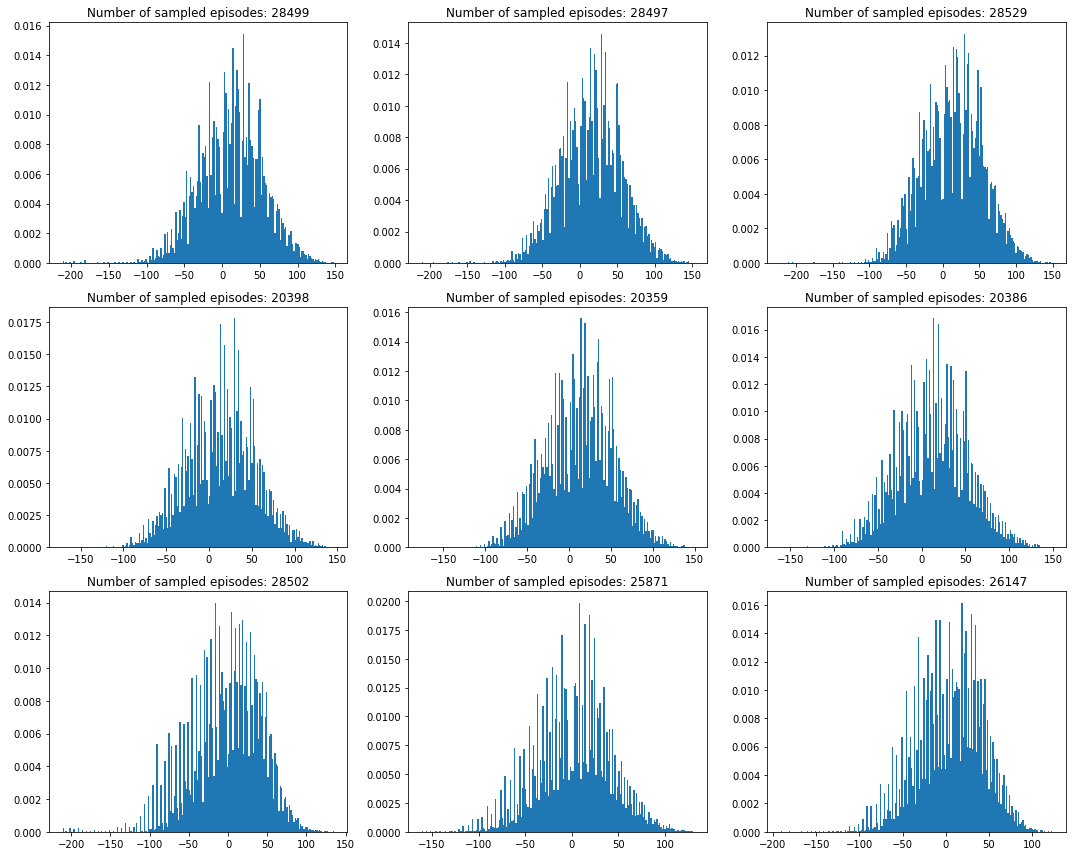

In [4]:
results_files = {"david": ["david_200221.npy", "david_210221.npy", "david_210221_2.npy"],
                 "my_env": ["my_210220.npy", "my_210221.npy", "my_210221_2.npy"],
                 "new": ["new_gath_repl_1.npy", "new_gath_repl_2.npy", "new_gath_repl_3.npy"],
                 "tfa": ["gathering_replication_1.npy", "gathering_replication_2.npy", "gathering_replication_3.npy",
                         "gathering_replication_4.npy"]
                 }

keys = sorted(results_files.keys())
results = dict()
for key in keys:
    results[key] = [np.load("results/" + file) for file in results_files[key]]

if True:
    for key in keys:
        results[key] = [result[result != -1] for result in results[key]]

plt.figure(figsize=(15, 12))
i = 1
for result in results["my_env"] + results["david"] + results["tfa"][:-1]:
    plt.subplot(3, 3, i)
    plt.title(f"Number of sampled episodes: {result.shape[0]}")
    plt.hist(result, bins=200, density=True)
    i += 1

plt.tight_layout()
plt.show()

In [5]:
intra_wds = dict()
for key in keys:
    intra_wds[key] = [wasserstein_distance(results[key][i], results[key][j])
                      for i in range(len(results[key])) for j in range(i+1, len(results[key]))]

inter_wds = dict()
for i in range(len(keys)):
    for j in range(i, len(keys)):
        key_1, key_2 = keys[i], keys[j]
        inter_wds[key_1 + "-" + key_2] = [wasserstein_distance(result_1, result_2)
                                          for result_1 in results[key_1] for result_2 in results[key_2]]


print("David's agents mean WD:", np.mean(intra_wds["david"]))
print("My agents mean WD:", np.mean(intra_wds["my_env"]))
print("New agents mean WD:", np.mean(intra_wds["new"]))
print("TFA mean WD:", np.mean(intra_wds["tfa"]))

print("David-My agents mean WD:", np.mean(inter_wds["david-my_env"]))
print("David-TFA agents mean WD:", np.mean(inter_wds["david-tfa"]))
print("My-TFA agents mean WD:", np.mean(inter_wds["my_env-tfa"]))
print("David-New agents mean WD:", np.mean(inter_wds["david-new"]))

David's agents mean WD: 1.106189494518793
My agents mean WD: 1.7335248461502317
New agents mean WD: 2.4261434231800423
TFA mean WD: 4.5276854318525475
David-My agents mean WD: 1.360441297850109
David-TFA agents mean WD: 10.101092138984713
My-TFA agents mean WD: 10.570074489234102
David-New agents mean WD: 1.4995507104621322


In [6]:
for key in keys:
    print(key, [np.mean(result) for result in results[key]])

david [14.164673, 12.903974, 12.833268]
my_env [12.339485, 14.83121, 13.910162]
new [13.830037, 14.39904, 11.045087]
tfa [-0.8267841, 2.2941518, 4.842429, 6.4895797]
